# Capstone Project 2 - Fabian Sjarifudin
Dataset : Public Transportation Transaction Transjakarta

**Latar Belakang**

Dalam konteks layanan transportasi publik, pemahaman mendalam tentang pola perjalanan pelanggan, tingkat penggunaan rute, dan aktivitas stasiun menjadi sangat penting bagi manajemen operasional. Analisis ini bertujuan untuk memberikan wawasan tentang perilaku perjalanan pelanggan dan kualitas layanan pada layanan Transjakarta. Dengan pertumbuhan terus menerus dalam jumlah penumpang, penting bagi perusahaan transportasi untuk memiliki pemahaman yang kuat tentang saat-saat sibuk, rute yang paling populer, dan tingkat penggunaan stasiun. Latar belakang ini menggarisbawahi pentingnya analisis tersebut dalam meningkatkan efisiensi operasional, mengoptimalkan layanan, dan meningkatkan pengalaman pelanggan secara keseluruhan.







# Data

Untuk analisa pada project ini, kita perlu menganalisa data yang akan kami gunakan terlebih dahulu.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import data csv transjakarta dari Google Drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('/content/drive/MyDrive/Capstone 2/Transjakarta.csv')
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


Pada data Transjakarta.csv, terdapat 21 kolom data:


1. transID: ID transaksi unik untuk setiap transaksi
2. payCardID: Identifier utama pelanggan. Kartu yang digunakan pelanggan sebagai tiket untuk masuk dan keluar.
3. payCardBank: Nama bank penerbit kartu pelanggan.
4. payCardName: Nama pelanggan yang tertanam di dalam kartu.
5. payCardSex: Jenis kelamin pelanggan yang tertanam di dalam kartu.
6. payCardBirthDate: Tahun kelahiran pelanggan.
7. corridorID: ID Koridor / ID Rute sebagai kunci untuk pengelompokan rute.
8. corridorName: Nama Koridor / Nama Rute yang berisi Start dan Finish untuk setiap rute.
direction: 0 untuk Berangkat, 1 untuk Kembali. Arah rute.
9. tapInStops: ID Berhenti Tap In (masuk) untuk mengidentifikasi nama berhenti.
10. tapInStopsName: Nama Berhenti Tap In (masuk) di mana pelanggan masuk.
11. tapInStopsLat: Garis lintang Berhenti Tap In.
12. tapInStopsLon: Garis bujur Berhenti Tap In.
13. stopStartSeq: Urutan berhenti, 1st stop, 2nd stop, dll. Terkait dengan arah.
14. tapInTime: Waktu tap in. Tanggal dan waktu.
15. tapOutStops: ID Berhenti Tap Out (keluar) untuk mengidentifikasi nama 16.berhenti.
16. tapOutStopsName: Nama Berhenti Tap Out (keluar) di mana pelanggan keluar.
17. tapOutStopsLat: Garis lintang Berhenti Tap Out.
18. tapOutStopsLon: Garis bujur Berhenti Tap Out.
19. stopEndSeq: Urutan berhenti, 1st stop, 2nd stop, dll. Terkait dengan arah.
20. tapOutTime: Waktu tap out. Tanggal dan waktu.
21. payAmount: Jumlah yang dibayar pelanggan. Beberapa gratis. Beberapa tidak



# Data Cleaning & Understanding


Sebelum memulai analisis mendalam, penting untuk memahami dataset Transjakarta secara lebih mendalam melalui tahap data understanding. Dari proses ini, kita akan mengidentifikasi anomali-anomali yang mungkin ada dalam dataset dan memutuskan langkah-langkah apa yang perlu diambil untuk membersihkan data tersebut. Misalnya, kita akan memeriksa apakah ada nilai yang hilang atau tidak valid pada atribut seperti waktu tap in atau tap out, dan jika ditemukan, kita akan menentukan apakah nilai-nilai ini dapat diisi kembali atau apakah kita perlu menghapus baris yang terkait. Selain itu, kita akan memeriksa apakah ada duplikasi data yang perlu dihapus atau apakah ada outlier yang perlu ditangani. Setiap tindakan yang diambil akan disertai dengan justifikasi yang kuat, baik berdasarkan pengetahuan domain tentang operasi Transjakarta maupun analisis statistik terkait. Dengan membersihkan dataset dengan cermat, kita dapat memastikan keakuratan dan keandalan analisis yang akan dilakukan selanjutnya.

In [ ]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

In [ ]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


Kita bisa lihat bahwa:

1. Terdapat 37900 baris data berdasarkan *transID*
2. Beberapa kolom data seperti *corridorID, corridorName, tapInStops, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq,tapOutTime, PayAmount*
3. Pada Kolom *tapOutStopsName, tapOutTime*, jum data.lah data tidak sama dengan 37900, harus di isi dengan data yang mengambarkan rata-rata


Dalam konteks analisis data untuk Capstone Project Module 2, diperlukan penentuan kolom-kolom yang relevan dalam dataset untuk menganalisis pola perjalanan pelanggan dan kualitas layanan serta keterlambatan dalam layanan Transjakarta.

**1. Kolom yang diperlukan meliputi payCardID, direction, tapInStopsName, tapOutStopsName, tapInTime, tapOutTime, dan payAmount.**

**2. Beberapa kolom yang mungkin tidak relevan atau tidak diperlukan dapat dibuang, seperti transID, payCardBank, payCardName, payCardSex, dan payCardBirthDate.**

**3. Kolom terkait rute seperti corridorID dan corridorName, serta koordinat seperti tapInStopsLat, tapInStopsLon, tapOutStopsLat, dan tapOutStopsLon juga mungkin tidak diperlukan kecuali untuk analisis spasial. Dengan memilih kolom yang tepat, analisis akan menjadi lebih efisien dan relevan untuk mendukung Capstone Project Module 2 ini.**

In [ ]:
pd.set_option('display.max_colwidth', 0)

# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

In [ ]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

In [ ]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Capstone 2/Transjakarta.csv', usecols=['payCardID', 'corridorName','direction', 'tapInStopsName', 'tapOutStopsName', 'tapInTime', 'tapOutTime', 'payAmount'])

df


,payCardID,corridorName,direction,tapInStopsName,tapInTime,tapOutStopsName,tapOutTime,payAmount,hour
0,180062659848800,Matraman Baru - Ancol,1.0,Pal Putih,2023-04-03 05:21:44,Tegalan,2023-04-03 06:00:53,3500.0,5
1,4885331907664776,Stasiun Tebet - Karet via Patra Kuningan,0.0,Kemenkes 2,2023-04-03 05:42:44,Sampoerna Strategic,2023-04-03 06:40:01,3500.0,5
2,4996225095064169,Pantai Maju - Kota,0.0,Gg. Kunir II,2023-04-03 05:59:06,Simpang Kunir Kemukus,2023-04-03 06:50:55,3500.0,5
3,639099174703,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Taman Elok 1,2023-04-03 05:44:51,Raya Penggilingan,2023-04-03 06:28:16,3500.0,5
4,570928206772,Tanjung Priok - Pluit,0.0,Sunter Boulevard Barat,2023-04-03 06:17:35,Kali Besar Barat,2023-04-03 06:57:03,3500.0,6
...,...,...,...,...,...,...,...,...,...
37895,4685818286724028395,Ragunan - MH Thamrin via Semanggi,1.0,Tosari,2023-04-21 18:18:37,SMK 57,2023-04-21 19:55:49,3500.0,18
37896,6502902290603767,Pinang Ranti - Pramuka,1.0,Garuda Taman Mini,2023-04-18 21:52:31,Pinang Ranti,2023-04-18 22:28:22,3500.0,21
37897,213159426675861,Cibubur - Balai Kota,1.0,Plaza Sentral,2023-04-04 10:29:47,Buperta Cibubur,2023-04-04 13:27:25,20000.0,10
37898,377840859133591,Tanah Abang - Jembatan Lima,1.0,Museum Textile,2023-04-15 19:59:26,JPO Blok G,2023-04-15 20:27:50,3500.0,19


# Missing Values CorridorName

Karena kita tidak bisa tahu atau menggunakan data mode untuk mengambarkan data corridor mana yang digunakan, akan kami berikan data 'Unknown' pada missing values CorridorName.

In [ ]:
# Mengisi missing values pada kolom "corridorName" dengan nilai tertentu (misalnya "Unknown")
df['corridorName'].fillna('Unknown', inplace=True)

# Missing Values tapOutTime & tapOutStopsName

Untuk missing values pada kolom tapOutTime & tapOutName, akan diisi dengan tapOutTime & tapOutName yang paling sering muncul (mode)

In [ ]:
# Hitung nilai yang paling sering muncul (mode) untuk kolom tapOutStopsName
mode_tapOutStopsName = df['tapOutStopsName'].mode()[0]

# Hitung mode untuk kolom tapOutTime dan konversi ke dalam format datetime
mode_tapOutTime = pd.to_datetime(df['tapOutTime']).mode()[0]

# Isi nilai yang hilang dengan mode
df['tapOutStopsName'].fillna(mode_tapOutStopsName, inplace=True)
df['tapOutTime'].fillna(mode_tapOutTime, inplace=True)

# Menampilkan DataFrame setelah nilai yang hilang diisi dengan mode
print(df)

              transID            payCardID payCardBank  \
0      EIIW227B8L34VB      180062659848800      emoney   
1      LGXO740D2N47GZ     4885331907664776         dki   
2      DJWR385V2U57TO     4996225095064169         dki   
3      JTUZ800U7C86EH         639099174703       flazz   
4      VMLO535V7F95NJ         570928206772       flazz   
...               ...                  ...         ...   
37895  ZWEC949B8Q87QG  4685818286724028395      brizzi   
37896  YHHK837P6Y95GN     6502902290603767         dki   
37897  YXPP627N4G95HO      213159426675861      emoney   
37898  RGVK175U2U98UV      377840859133591      emoney   
37899  FMZZ963S4B68ZP         501862539795       flazz   

                  payCardName payCardSex  payCardBirthDate corridorID  \
0              Bajragin Usada          M              2008          5   
1                Gandi Widodo          F              1997         6C   
2               Emong Wastuti          F              1992        R1A   
3          

# Missing Values PayAmount

Untuk missing values pada kolom PayAmount, akan diisi dengan PayAmount yang paling sering muncul (mode)

In [ ]:
# Mengganti NaN dengan nilai yang paling sering muncul (mode) dalam kolom payAmount
top_payAmount = df['payAmount'].mode()[0]  # Ambil nilai mode pertama
df['payAmount'] = df['payAmount'].fillna(top_payAmount)

# Ganti nilai 0 dengan 3500
df['payAmount'] = df['payAmount'].replace(0, 3500)

# Display the DataFrame
df

,payCardID,corridorName,direction,tapInStopsName,tapInTime,tapOutStopsName,tapOutTime,payAmount
0,180062659848800,Matraman Baru - Ancol,1.0,Pal Putih,2023-04-03 05:21:44,Tegalan,2023-04-03 06:00:53,3500.0
1,4885331907664776,Stasiun Tebet - Karet via Patra Kuningan,0.0,Kemenkes 2,2023-04-03 05:42:44,Sampoerna Strategic,2023-04-03 06:40:01,3500.0
2,4996225095064169,Pantai Maju - Kota,0.0,Gg. Kunir II,2023-04-03 05:59:06,Simpang Kunir Kemukus,2023-04-03 06:50:55,3500.0
3,639099174703,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Taman Elok 1,2023-04-03 05:44:51,Raya Penggilingan,2023-04-03 06:28:16,3500.0
4,570928206772,Tanjung Priok - Pluit,0.0,Sunter Boulevard Barat,2023-04-03 06:17:35,Kali Besar Barat,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...
37895,4685818286724028395,Ragunan - MH Thamrin via Semanggi,1.0,Tosari,2023-04-21 18:18:37,SMK 57,2023-04-21 19:55:49,3500.0
37896,6502902290603767,Pinang Ranti - Pramuka,1.0,Garuda Taman Mini,2023-04-18 21:52:31,Pinang Ranti,2023-04-18 22:28:22,3500.0
37897,213159426675861,Cibubur - Balai Kota,1.0,Plaza Sentral,2023-04-04 10:29:47,Buperta Cibubur,2023-04-04 13:27:25,20000.0
37898,377840859133591,Tanah Abang - Jembatan Lima,1.0,Museum Textile,2023-04-15 19:59:26,JPO Blok G,2023-04-15 20:27:50,3500.0


# Data yang sudah Bersih


In [ ]:
pd.set_option('display.max_colwidth', 0)

# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc


,Column Name,Number of Unique,Unique Sample
0,payCardID,1989,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, 342875882384375, 4744480387450088900, 4909284437358495207, 2267435685058176, 4613366061817460310, 4664503638851963221, 341371220559499, ...]"
1,corridorName,216,"[Matraman Baru - Ancol, Stasiun Tebet - Karet via Patra Kuningan, Pantai Maju - Kota, Pulo Gebang - Pulo Gadung 2 via PIK, Tanjung Priok - Pluit, Cibubur - Balai Kota, Kalibata - Kuningan, Bekasi Barat - Kuningan, Rempoa - Blok M, Kampung Melayu - Tanah Abang via Cikini, BKN - Blok M, PGC 2 - Grogol 2, Pulo Gadung 2 - Tosari, Pasar Minggu - Jagakarsa, Ciputat - Kampung Rambutan, Ciledug - Tendean, Kebayoran Lama - Jelambar, Pinang Ranti - Pluit, Terminal Tanjung Priok - Ancol Barat, Poris Plawad - Bundaran Senayan, Cililitan - Condet, Ragunan - Gelora Bung Karno, Kampung Melayu - Pulo Gebang via BKT, Kampung Melayu - Duren Sawit, Pulo Gebang - Matraman, Pesanggrahan - Blok M, Rusun Flamboyan - Cengkareng, Blok M - Kota, Kampung Rambutan - Ragunan, Senen - Blok M, Pancoran - Kampung Rambutan, Senen - Lebak Bulus, Jakarta International Stadium - Senen, Monas - Pantai Indah Kapuk, Harmoni - Jakarta International Stadium, Bulak Turi - Tanjung Priok, Ragunan - Blok M via Kemang, Pulo Gebang - Pulo Gadung 2, Terminal Tanah Merah - Pulo Gadung, Pinang Ranti - Pramuka, Tongtek - Tebet Eco Park (TEP) - Cililitan, Kampung Melayu - Pondok Kelapa, Pulo Gadung - Monas, Pondok Kelapa - BKN, Cilangkap - Cililitan, Puri Beta - Pancoran Barat, Kampung Rambutan - Pondok Gede, Tanah Abang - Meruya, Kampung Rambutan - Monas, Pasar Minggu - Tanah Abang, Rusun Pesakih - Kalideres, Rusun Kapuk Muara - Penjaringan, Lebak Bulus - Pasar Baru, Bekasi Timur - Cawang, Pelabuhan Kaliadem - Kota, Kampung Rambutan - Pinang Ranti, Tanjung Priok - Jembatan Item, Andara - Stasiun Universitas Pancasila, Stasiun Tebet - Kampung Melayu, Batusari - Grogol, Pinang Ranti - Kampung Rambutan, PGC 2 - Tanjung Priok, Kampung Rambutan - Tanjung Priok, Cililitan - Kp. Pulo, Summarecon Bekasi - BNN, Terminal Kalideres - Terminal Muara Angke, Cililitan - Condet via Kayu Manis, Blok M - Andara, Rusun Rawa Bebek - Bukit Duri, Sarana Jaya - Tebet Eco Park (TEP) - Stasiun Cawang, Rusun Cakung Barat - Pulo Gadung, Kebayoran Lama - Tanah Abang, Pluit - Senen, PGC 1 - Ancol, Tanjung Priok - Tanah Merdeka, Jelambar - Kota, Lebak Bulus - Cipulir, Kampung Rambutan - Lebak Bulus, Blok M - PGC, Cawang U

# Analisa Statistika Deskriptif


1. **Pengukuran Tendency Sentral** Dilakukan untuk mengetahui mean, median, dan modus dari data numerikal

Dengan fungsi df.describe langsung dapat diketahui mean, dan median(50%) dari data tersebut

In [ ]:
df.describe().T[['mean', '50%']]

,mean,50%
payCardID,425623895068580096.0,3507946556271373.0
direction,0.501056,1.0
tapInTime,2023-04-16 08:10:16.869891584,2023-04-16 17:28:14.500000
tapOutTime,2023-04-16 02:08:22.358437376,2023-04-15 20:06:33.500000
payAmount,4260.091743,3500.0
hour,12.525299,13.0


**2. Pengukuran Variabilitas**
Dilakukan untuk mengetahui range data, standar deviasi, dan IQR dari data numerikal.

Untuk range data dapat diketahui sebagai berikut:

In [ ]:
# Pilih hanya kolom-kolom yang bukan tipe string
numerical_columns = df.select_dtypes(exclude=['object'])

# Menampilkan ringkasan statistik untuk data numerikal
summary_stats = numerical_columns.describe()

# Menampilkan range data
data_range = numerical_columns.max() - numerical_columns.min()

# Menampilkan standar deviasi
std_deviation = numerical_columns.std()

# Menampilkan IQR (interquartile range)
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

print("Range Data:")
print(data_range)
print("\nStandar Deviasi:")
print(std_deviation)
print("\nInterquartile Range:")
print(IQR)


Range Data:
payCardID     4997693870502459173
direction     1.0                
tapInTime     29 days 15:33:14   
tapOutTime    29 days 15:55:47   
payAmount     16500.0            
hour          16                 
dtype: object

Standar Deviasi:
payCardID     1322800264922556416.0    
direction     0.500006                 
tapInTime     7 days 17:20:59.647571246
tapOutTime    7 days 17:50:28.390146985
payAmount     3458.917015              
hour          5.714927                 
dtype: object

Interquartile Range:
payCardID     4518978885302544.0        
direction     1.0                       
tapInTime     11 days 12:44:59          
tapOutTime    12 days 11:14:36.249999872
payAmount     0.0                       
hour          10.0                      
dtype: object


# Data Analysis untuk Frekuensi Perjalanan Rute top 10

Dalam analisis ini, saya fokus pada pola perjalanan pelanggan pada top 10 rute yang paling sering digunakan. Pertama, kami mengidentifikasi top 10 rute berdasarkan jumlah perjalanan yang dilakukan. Kemudian, saya menganalisis waktu dan frekuensi perjalanan pada setiap rute dengan memplot jumlah perjalanan per jam untuk setiap rute. Dari visualisasi ini, kita dapat melihat pola perjalanan pelanggan pada berbagai jam dalam sehari untuk masing-masing rute. Selain itu, kami juga membandingkan jumlah perjalanan antara rute-rute tersebut dengan menampilkan histogram jumlah perjalanan pada setiap rute. Dengan analisis ini, kami dapat memahami tren perjalanan pelanggan dan memperoleh wawasan yang berharga untuk pengelolaan layanan transportasi.

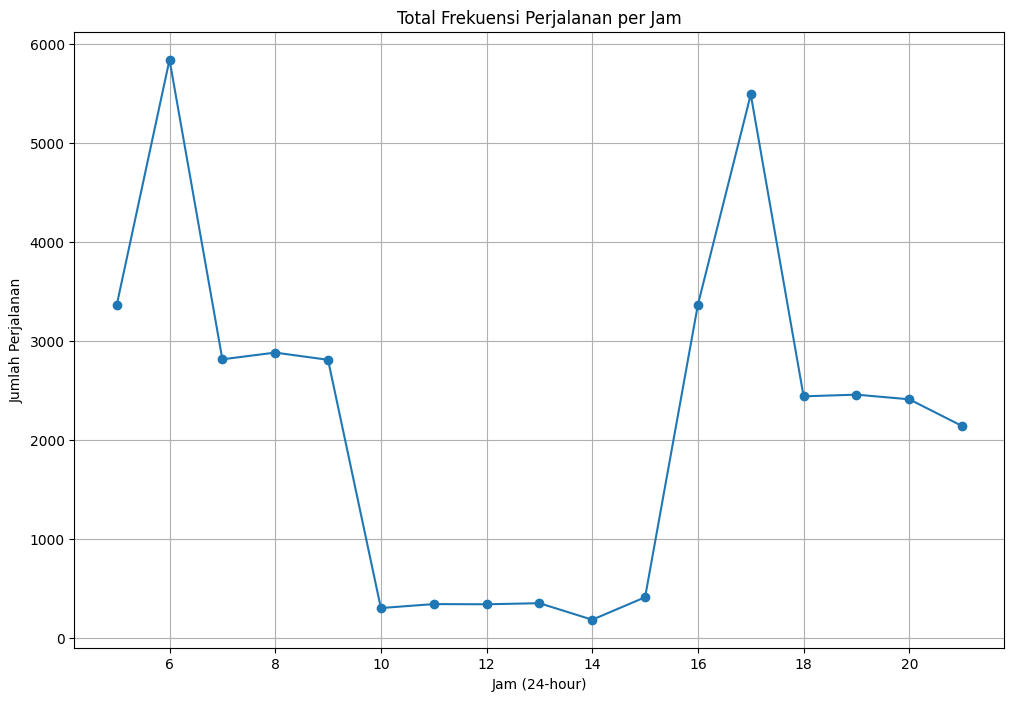

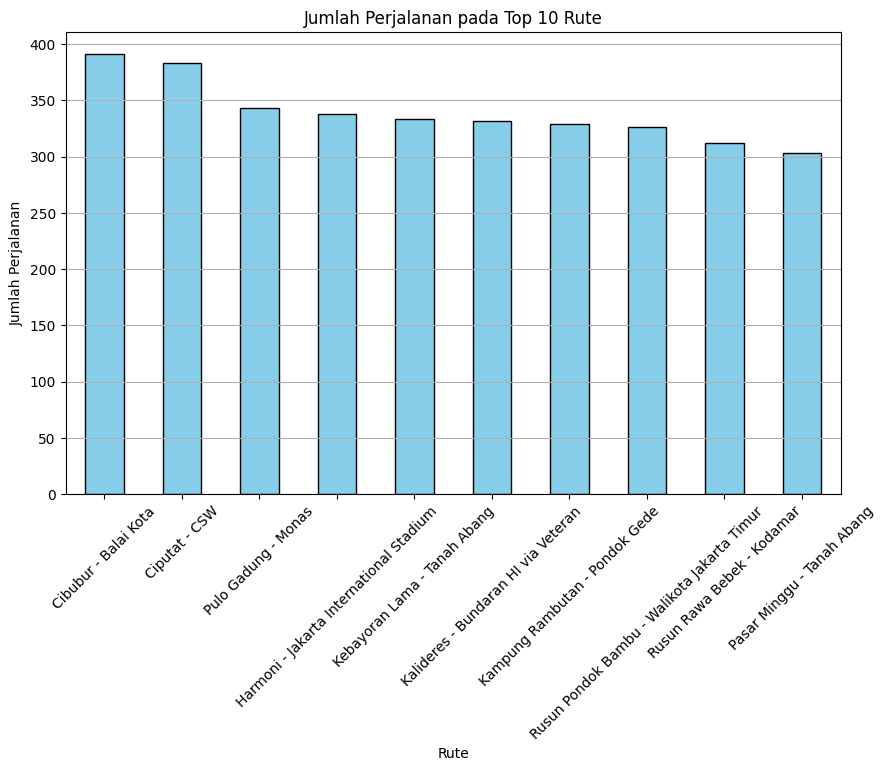

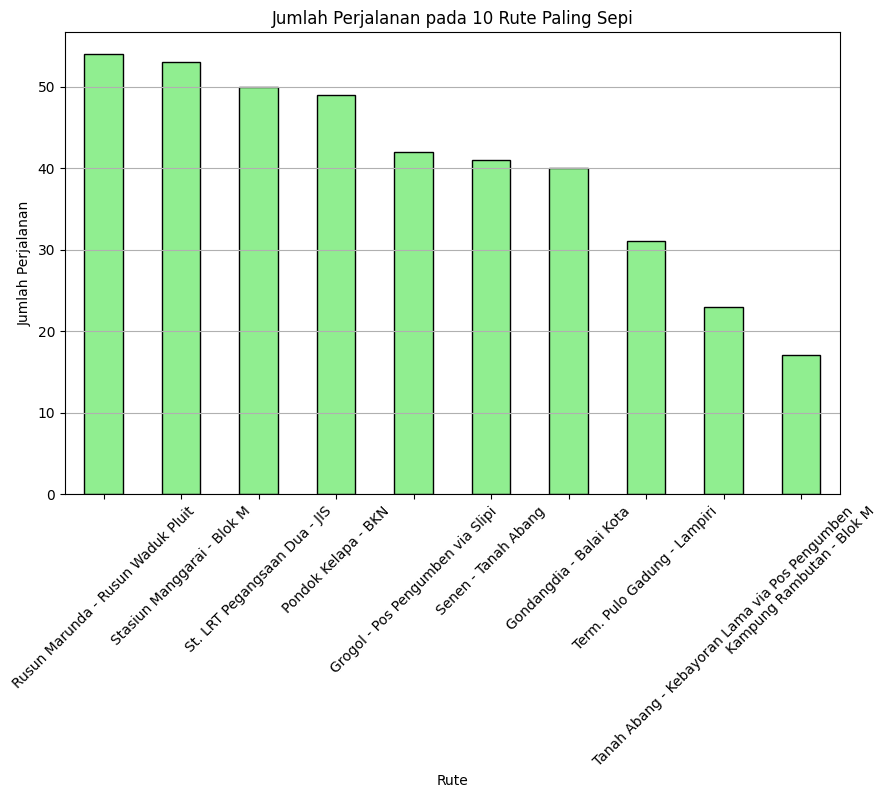

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'tapInTime' column to datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'])

# Extract the hour component and create a new 'hour' column
df['hour'] = df['tapInTime'].dt.hour

# Grouping the entire dataset by hour and calculating the total number of journeys for each hour
perjalanan_per_jam_total = df.groupby('hour').size()

# Plotting the frequency of journeys per hour
plt.figure(figsize=(12, 8))
plt.plot(perjalanan_per_jam_total.index, perjalanan_per_jam_total.values, marker='o', linestyle='-')

plt.title('Total Frekuensi Perjalanan per Jam')
plt.xlabel('Jam (24-hour)')
plt.ylabel('Jumlah Perjalanan')
plt.grid(True)
plt.show()


# Mengidentifikasi top 10 rute yang paling sering digunakan oleh pelanggan
top_10_rute = df['corridorName'].value_counts().head(10)

# Membandingkan pola perjalanan antara berbagai koridor atau rute
plt.figure(figsize=(10, 6))
top_10_rute.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Jumlah Perjalanan pada Top 10 Rute')
plt.xlabel('Rute')
plt.ylabel('Jumlah Perjalanan')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Mengidentifikasi 10 rute yang paling jarang digunakan oleh pelanggan
bottom_10_rute = df['corridorName'].value_counts().tail(10)

# Membandingkan pola perjalanan antara berbagai koridor atau rute
plt.figure(figsize=(10, 6))
bottom_10_rute.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Jumlah Perjalanan pada 10 Rute Paling Sepi')
plt.xlabel('Rute')
plt.ylabel('Jumlah Perjalanan')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


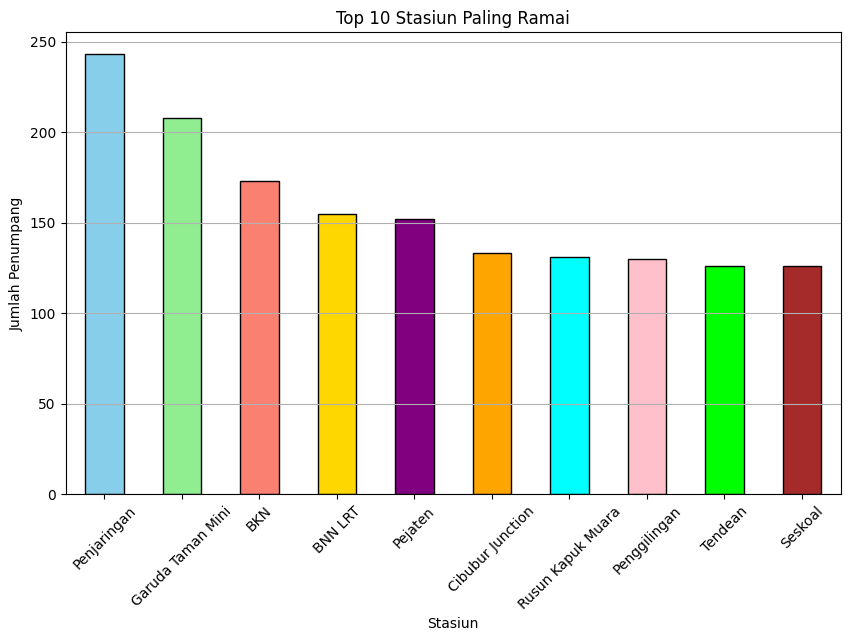

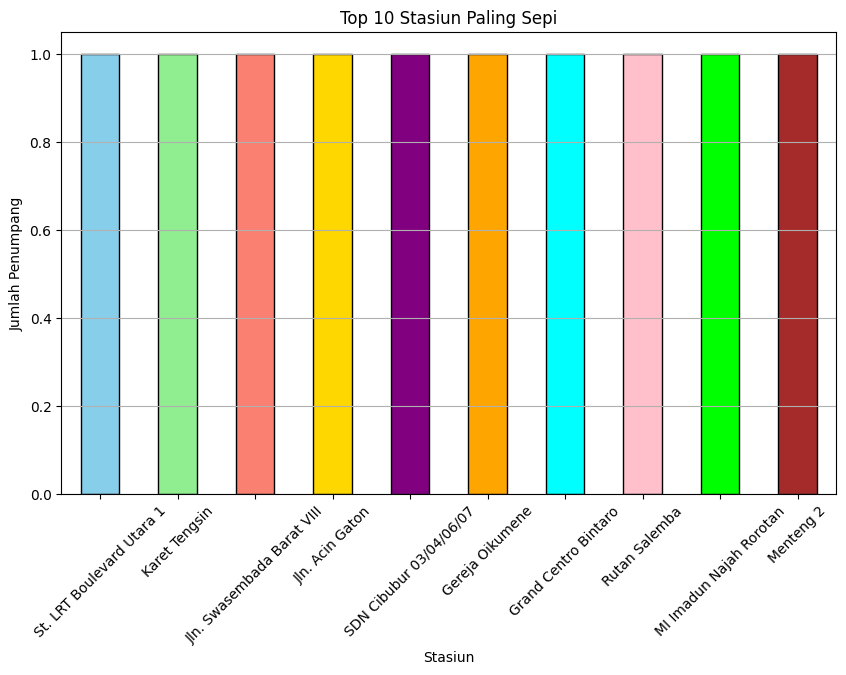

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Menghitung jumlah penumpang yang menggunakan setiap stasiun
stasiun_ramai = df['tapInStopsName'].value_counts().head(10)

# Plot grafik untuk visualisasi dengan warna berbeda tiap stasiun
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'purple', 'orange', 'cyan', 'pink', 'lime', 'brown']
stasiun_ramai.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Top 10 Stasiun Paling Ramai')
plt.xlabel('Stasiun')
plt.ylabel('Jumlah Penumpang')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Menghitung jumlah penumpang yang menggunakan setiap stasiun
stasiun_sepi = df['tapInStopsName'].value_counts(ascending=True).head(10)

# Plot grafik untuk visualisasi dengan warna berbeda tiap stasiun
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'purple', 'orange', 'cyan', 'pink', 'lime', 'brown']
stasiun_sepi.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Top 10 Stasiun Paling Sepi')
plt.xlabel('Stasiun')
plt.ylabel('Jumlah Penumpang')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Kesimpulan & Rekomendasi

1. Jumlah perjalanan paling tinggi terjadi pada jam 6 pagi dan jam 5 sore, yang mengindikasikan saat orang berangkat dan pulang kerja. Rekomendasi: Perusahaan perlu meningkatkan kapasitas layanan pada jam-jam sibuk ini dengan menambah armada atau meningkatkan frekuensi perjalanan untuk mengakomodasi kebutuhan penumpang yang tinggi.

2. Koridor atau rute yang paling ramai adalah Cibubur - Balai Kota dengan 391 perjalanan, sedangkan koridor yang paling sepi adalah Kampung Rambutan - Blok M dengan hanya 71 perjalanan. Rekomendasi: Perusahaan perlu memperkuat manajemen operasional pada koridor ramai untuk memastikan kelancaran layanan, sementara koridor yang sepi memerlukan evaluasi untuk memahami penyebab rendahnya penggunaan.

3. Stasiun yang paling aktif adalah Penjaringan, sementara stasiun yang paling tidak aktif adalah Menteng 2. Rekomendasi: Perusahaan dapat melakukan evaluasi menyeluruh terhadap stasiun-stasiun yang kurang aktif untuk mengetahui penyebabnya, dan jika diperlukan, strategi pemasaran atau perbaikan fasilitas dapat diterapkan untuk meningkatkan penggunaan stasiun tersebut.


In [ ]:

df.to_excel('processed_data.xlsx', index=False)